using CNN to classify images 

In [1]:
import tensorflow as tf

2022-08-03 01:08:00.756439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-03 01:08:00.756474: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import tensorflow_datasets as tfds

In [3]:
(x_train, y_train), (x_test, y_test)  = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

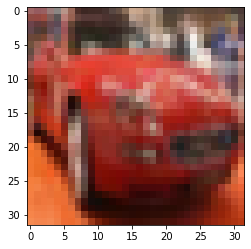

In [6]:
plt.imshow(x_train[5])

In [7]:
x_train[4].shape

(32, 32, 3)

creating validation data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.05, random_state = 0)

In [10]:
x_validate.shape

(2500, 32, 32, 3)

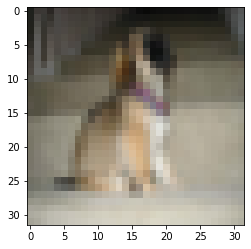

In [11]:
plt.imshow(x_validate[4])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

In [14]:
def normalizer(data):
    data = data.astype("float32")
    data = data/255.0
    return data

In [15]:
x_train, x_validate, x_test = normalizer(x_train), normalizer(x_validate), normalizer(x_test)

In [16]:
x_train[0]

array([[[0.3019608 , 0.4117647 , 0.67058825],
        [0.19215687, 0.44705883, 0.8901961 ],
        [0.21176471, 0.44705883, 0.8745098 ],
        ...,
        [0.24313726, 0.48235294, 0.9098039 ],
        [0.3137255 , 0.5254902 , 0.9137255 ],
        [0.44313726, 0.5254902 , 0.8       ]],

       [[0.2784314 , 0.4627451 , 0.7254902 ],
        [0.24313726, 0.46666667, 0.7921569 ],
        [0.23921569, 0.46666667, 0.78039217],
        ...,
        [0.27450982, 0.4862745 , 0.78039217],
        [0.2901961 , 0.49411765, 0.7764706 ],
        [0.31764707, 0.47843137, 0.74509805]],

       [[0.36862746, 0.54509807, 0.70980394],
        [0.36862746, 0.53333336, 0.6862745 ],
        [0.36862746, 0.5372549 , 0.6862745 ],
        ...,
        [0.36862746, 0.53333336, 0.6901961 ],
        [0.35686275, 0.5372549 , 0.7019608 ],
        [0.3529412 , 0.53333336, 0.69411767]],

       ...,

       [[0.35686275, 0.5411765 , 0.7137255 ],
        [0.3529412 , 0.53333336, 0.69803923],
        [0.35686275, 0

In [17]:
x_train.max(), x_validate.max() , x_test.max()

(1.0, 1.0, 1.0)

In [18]:
x_train.min(), x_validate.min() , x_test.min()

(0.0, 0.0, 0.0)

succesful normalization 

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train, y_validate, y_test = to_categorical(y_train), to_categorical(y_validate), to_categorical(y_test)

In [21]:
y_train[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
y_train.shape

(47500, 10)

In [23]:
y_train[:3,:]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Train/Evaluate/Display error Metrics

In [24]:
def results(model, epoch = 20):
    r = model.fit(x_train, y_train, batch_size= 32, epochs = epoch, validation_data = (x_validate, y_validate), verbose = 1)
    accuracy = model.evaluate(x_test, y_test)
    print("test loss is  {}".format(accuracy[0]))
    print("test set accuray  {}".format(accuracy[1]*100))
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range,r.history['accuracy'])
    plt.plot(epoch_range,r.history['val_accuracy'])
    plt.title('Classification Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validate'], loc= 'lower right')
    plt.show()
    plt.plot(epoch_range,r.history['loss'])
    plt.plot(epoch_range,r.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validate'], loc= 'lower right')
    plt.show()
    

In [25]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck',]

In [39]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def predict_class(filename, model):
    img = load_img(filename, target_size=(32,32))
    plt.imshow(img)
    img = img_to_array(img)
    img = img.reshape(1,32,32,3)
    img = img.astype('float32')
    img = img/225.0
    result = model.predict(img)
    Dict2 = {}
    for i in range(10):
        Dict2[result[0][i]] = classes[i]
    res = result[0]
    res.sort()
    #conveting index
    res = res[::-1]
    results =res
    print("Top predictions of these images are")
    for i in results:
        print("{} : {} ".format(Dict2[i] , (i*100).round(2)))

define some models

two conv layers model

In [27]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
model_1 = Sequential([Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)),
                      Conv2D(32, (3,3), activation = 'relu', padding = 'same'),
                      MaxPooling2D((2,2)),
                      Flatten(),
                      Dense(128, activation = 'relu'),
                      Dense(10, activation = 'softmax')
                     ])

2022-07-29 23:08:51.604582: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-29 23:08:51.604638: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-29 23:08:51.604674: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (turing-HP-G62-Notebook-PC): /proc/driver/nvidia/version does not exist
2022-07-29 23:08:51.613449: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
from tensorflow.keras.utils import plot_model

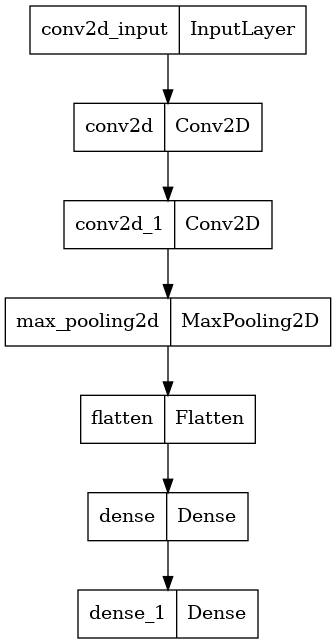

In [31]:
plot_model(model_1, to_file = 'model1.png')

In [32]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [31]:
SGD = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)

In [34]:
model_1.compile(optimizer = SGD, loss = 'categorical_crossentropy', metrics=['accuracy'])

2022-07-29 23:08:53.672044: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 583680000 exceeds 10% of free system memory.


Epoch 1/20
1485/1485 [==============================] - 96s 63ms/step - loss: 1.8895 - accuracy: 0.3243 - val_loss: 1.6640 - val_accuracy: 0.4016
Epoch 2/20
1485/1485 [==============================] - 93s 63ms/step - loss: 1.4639 - accuracy: 0.4798 - val_loss: 1.3628 - val_accuracy: 0.5044
Epoch 3/20
1485/1485 [==============================] - 93s 63ms/step - loss: 1.2643 - accuracy: 0.5533 - val_loss: 1.2323 - val_accuracy: 0.5544
Epoch 4/20
1485/1485 [==============================] - 94s 63ms/step - loss: 1.1486 - accuracy: 0.5970 - val_loss: 1.1586 - val_accuracy: 0.5804
Epoch 5/20
1485/1485 [==============================] - 93s 63ms/step - loss: 1.0595 - accuracy: 0.6289 - val_loss: 1.0915 - val_accuracy: 0.6144
Epoch 6/20
1485/1485 [==============================] - 93s 63ms/step - loss: 0.9755 - accuracy: 0.6595 - val_loss: 1.0290 - val_accuracy: 0.6332
Epoch 7/20
1485/1485 [==============================] - 94s 63ms/step - loss: 0.9050 - accuracy: 0.6839 - val_loss: 1.0303 -

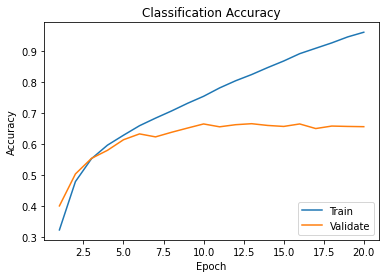

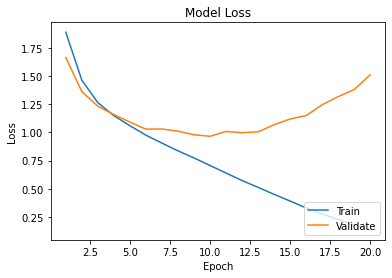

In [35]:
results(model_1)

Top predictions of these images are
airplane : 100.0 
deer : 0.0 
dog : 0.0 


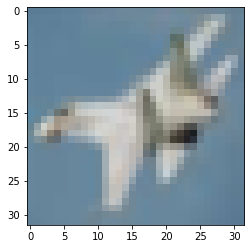

In [36]:
predict_class("file01.jpg", model_1)

four conv layers

In [37]:
model_2 = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)),
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [38]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [39]:
model_2.compile(optimizer = SGD, loss = 'categorical_crossentropy', metrics=['accuracy'])

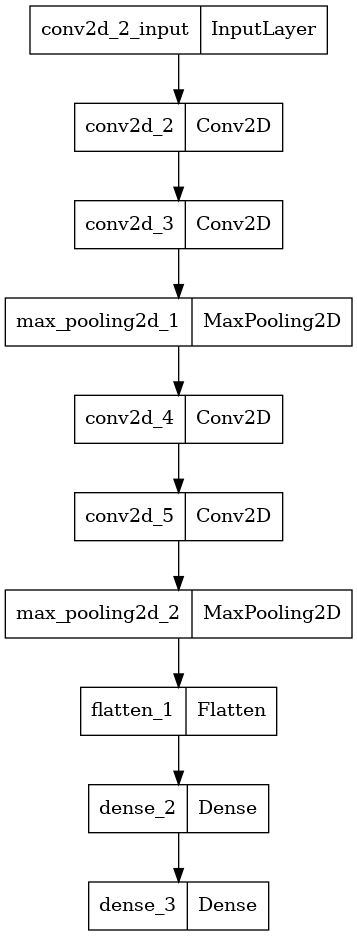

In [40]:
plot_model(model_2, to_file = 'model2.png')

Epoch 1/20


2022-07-29 23:41:08.152889: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 583680000 exceeds 10% of free system memory.


1485/1485 [==============================] - 149s 100ms/step - loss: 1.9605 - accuracy: 0.2893 - val_loss: 1.7142 - val_accuracy: 0.3932
Epoch 2/20
1485/1485 [==============================] - 149s 101ms/step - loss: 1.5314 - accuracy: 0.4535 - val_loss: 1.4066 - val_accuracy: 0.4968
Epoch 3/20
1485/1485 [==============================] - 150s 101ms/step - loss: 1.3297 - accuracy: 0.5229 - val_loss: 1.2617 - val_accuracy: 0.5496
Epoch 4/20
1485/1485 [==============================] - 150s 101ms/step - loss: 1.1959 - accuracy: 0.5760 - val_loss: 1.1586 - val_accuracy: 0.5856
Epoch 5/20
1485/1485 [==============================] - 150s 101ms/step - loss: 1.0828 - accuracy: 0.6169 - val_loss: 1.0546 - val_accuracy: 0.6212
Epoch 6/20
1485/1485 [==============================] - 150s 101ms/step - loss: 0.9856 - accuracy: 0.6534 - val_loss: 1.0016 - val_accuracy: 0.6444
Epoch 7/20
1485/1485 [==============================] - 151s 102ms/step - loss: 0.8986 - accuracy: 0.6850 - val_loss: 0.980

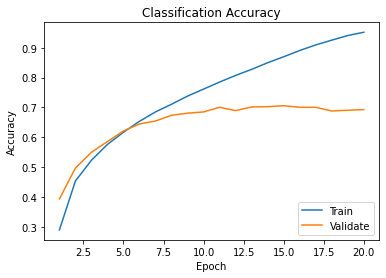

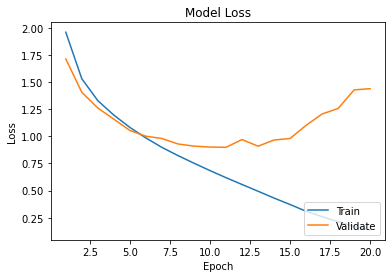

In [41]:
results(model_2)

Top predictions of these images are
airplane : 95.12 
cat : 4.5 
bird : 0.15 


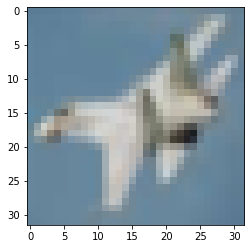

In [43]:
predict_class("file01.jpg", model_2)

6 conv layers

In [44]:
model_3 = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)),
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
    

In [45]:
model_3.compile(optimizer = SGD, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [46]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

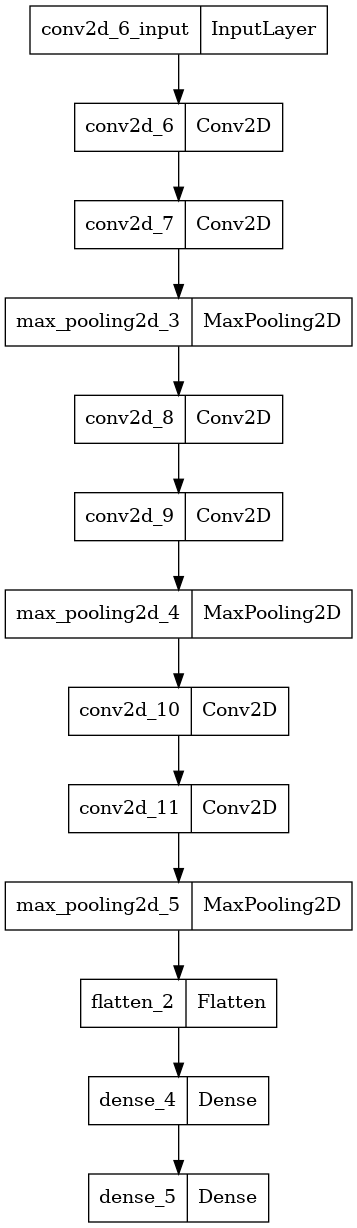

In [47]:
plot_model(model_3, to_file = 'model3.png')

2022-07-30 00:41:05.103169: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 583680000 exceeds 10% of free system memory.


Epoch 1/20
1485/1485 [==============================] - 196s 132ms/step - loss: 2.0494 - accuracy: 0.2423 - val_loss: 1.7984 - val_accuracy: 0.3672
Epoch 2/20
1485/1485 [==============================] - 189s 127ms/step - loss: 1.6100 - accuracy: 0.4208 - val_loss: 1.4924 - val_accuracy: 0.4628
Epoch 3/20
1485/1485 [==============================] - 190s 128ms/step - loss: 1.4108 - accuracy: 0.4962 - val_loss: 1.3162 - val_accuracy: 0.5320
Epoch 4/20
1485/1485 [==============================] - 190s 128ms/step - loss: 1.2842 - accuracy: 0.5414 - val_loss: 1.2005 - val_accuracy: 0.5672
Epoch 5/20
1485/1485 [==============================] - 190s 128ms/step - loss: 1.1664 - accuracy: 0.5868 - val_loss: 1.1218 - val_accuracy: 0.6100
Epoch 6/20
1485/1485 [==============================] - 190s 128ms/step - loss: 1.0663 - accuracy: 0.6232 - val_loss: 1.0544 - val_accuracy: 0.6328
Epoch 7/20
1485/1485 [==============================] - 190s 128ms/step - loss: 0.9720 - accuracy: 0.6591 - val_

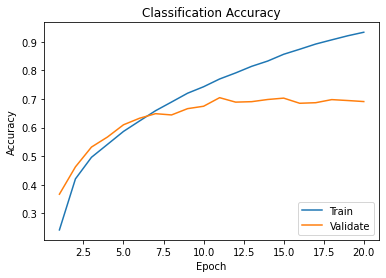

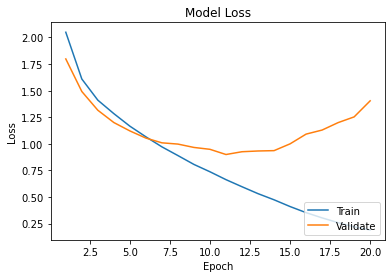

In [48]:
results(model_3)

Top predictions of these images are
airplane : 97.01 
deer : 2.97 
bird : 0.01 


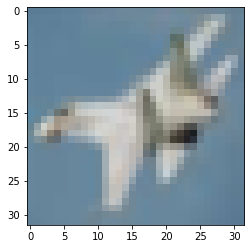

In [49]:
predict_class("file01.jpg", model_3)

adding dropout to avoid overfitting 

In [29]:
model_4 = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)),
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

2022-08-03 01:13:24.546080: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-03 01:13:24.546127: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-03 01:13:24.546156: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (turing-HP-G62-Notebook-PC): /proc/driver/nvidia/version does not exist
2022-08-03 01:13:24.555097: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
model_4.compile(optimizer = SGD, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

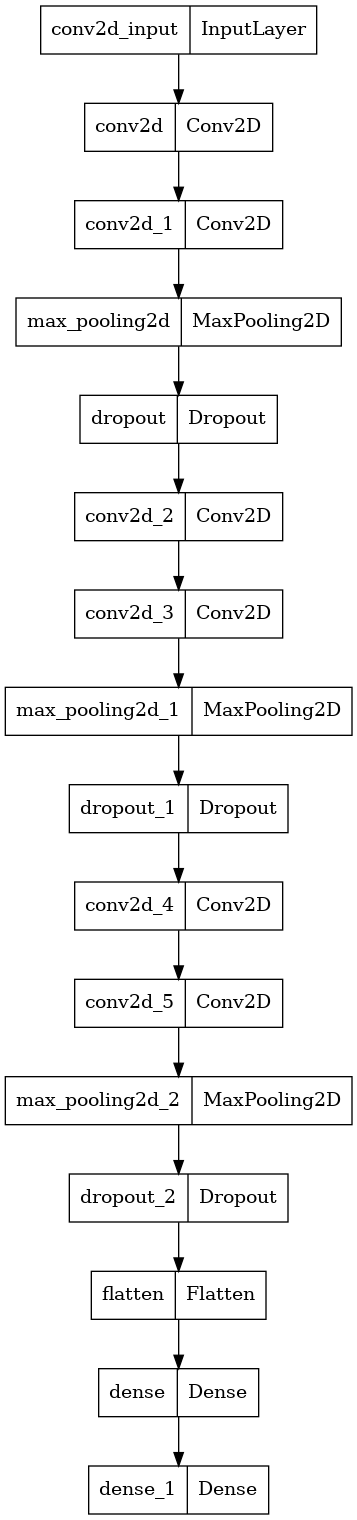

In [36]:
plot_model(model_4, to_file = 'model4.png')

2022-08-03 01:18:09.311352: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 583680000 exceeds 10% of free system memory.


Epoch 1/20
1485/1485 [==============================] - 207s 137ms/step - loss: 2.1076 - accuracy: 0.2136 - val_loss: 1.9319 - val_accuracy: 0.3004
Epoch 2/20
1485/1485 [==============================] - 199s 134ms/step - loss: 1.8089 - accuracy: 0.3395 - val_loss: 1.6461 - val_accuracy: 0.3952
Epoch 3/20
1485/1485 [==============================] - 202s 136ms/step - loss: 1.5720 - accuracy: 0.4292 - val_loss: 1.4364 - val_accuracy: 0.4988
Epoch 4/20
1485/1485 [==============================] - 200s 134ms/step - loss: 1.4281 - accuracy: 0.4841 - val_loss: 1.3021 - val_accuracy: 0.5356
Epoch 5/20
1485/1485 [==============================] - 201s 135ms/step - loss: 1.3178 - accuracy: 0.5239 - val_loss: 1.2063 - val_accuracy: 0.5584
Epoch 6/20
1485/1485 [==============================] - 221s 149ms/step - loss: 1.2166 - accuracy: 0.5638 - val_loss: 1.1343 - val_accuracy: 0.5924
Epoch 7/20
1485/1485 [==============================] - 232s 157ms/step - loss: 1.1289 - accuracy: 0.5997 - val_

2022-08-03 02:26:24.830474: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 10s 33ms/step - loss: 0.6761 - accuracy: 0.7655
test loss is  0.6760570406913757
test set accuray  76.5500009059906


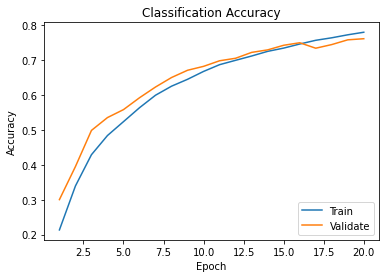

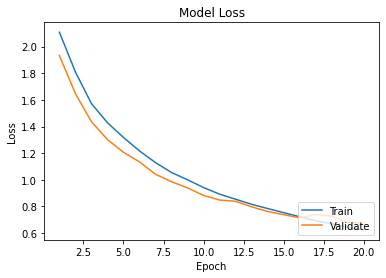

In [37]:
results(model_4)

Top predictions of these images are
airplane : 82.66 
deer : 7.15 
bird : 4.42 
ship : 2.32 
dog : 1.97 
cat : 0.94 
horse : 0.46 
frog : 0.03 
automobile : 0.02 
truck : 0.02 


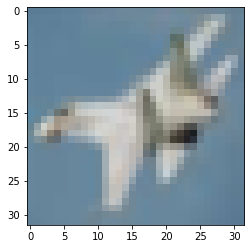

In [40]:
predict_class("file01.jpg", model_4)

normalization to avoid overfitting

In [46]:
weight_decay = 1e-4
model_5 = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same',kernel_regularizer = tf.keras.regularizers.l2(weight_decay), input_shape = (32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same',kernel_regularizer = tf.keras.regularizers.l2(weight_decay)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation = 'relu', padding = 'same',kernel_regularizer = tf.keras.regularizers.l2(weight_decay)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation = 'relu', padding = 'same',kernel_regularizer = tf.keras.regularizers.l2(weight_decay)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation = 'relu', padding = 'same',kernel_regularizer = tf.keras.regularizers.l2(weight_decay)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation = 'relu', padding = 'same',kernel_regularizer = tf.keras.regularizers.l2(weight_decay)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [47]:
model_5.compile(optimizer = SGD, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [48]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

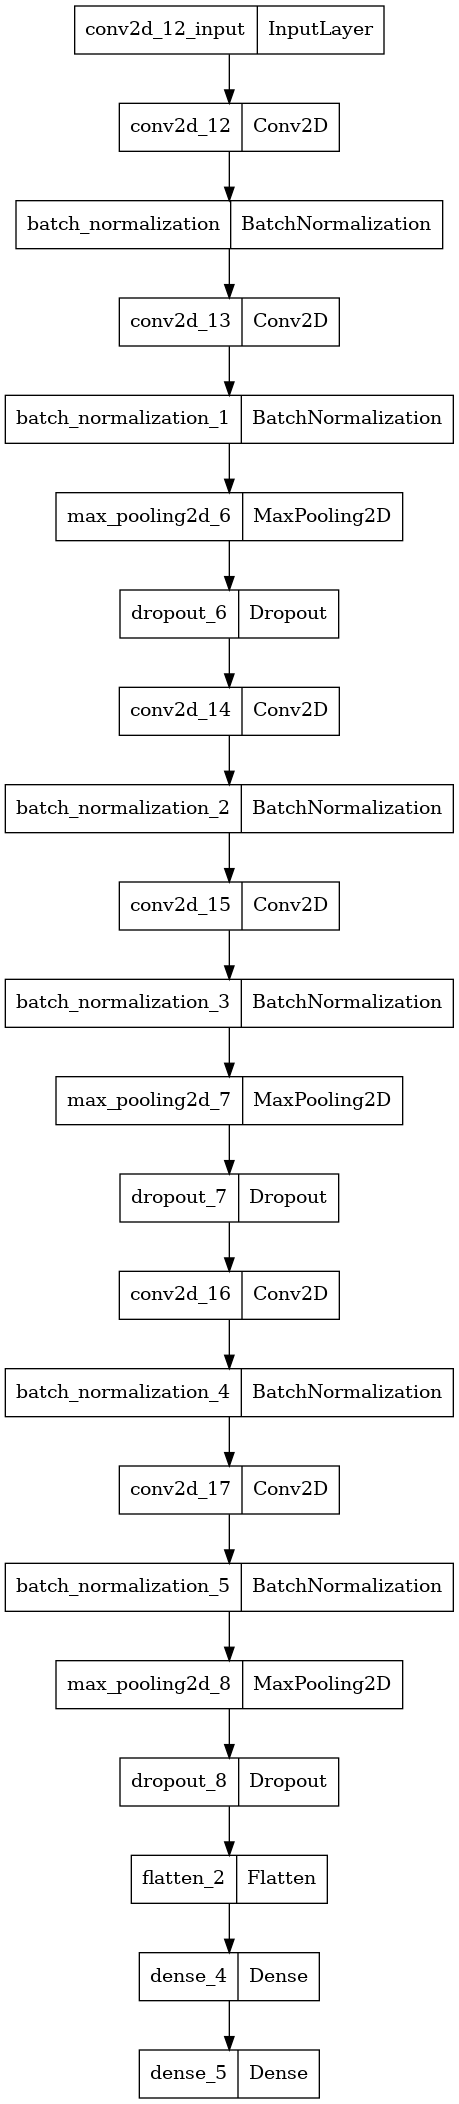

In [49]:
plot_model(model_5, to_file = 'model5.png')

Epoch 1/20


2022-08-03 04:14:59.748721: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 583680000 exceeds 10% of free system memory.


1485/1485 [==============================] - 250s 167ms/step - loss: 1.6067 - accuracy: 0.4365 - val_loss: 1.4336 - val_accuracy: 0.4868
Epoch 2/20
1485/1485 [==============================] - 244s 165ms/step - loss: 1.2096 - accuracy: 0.5802 - val_loss: 1.0796 - val_accuracy: 0.6188
Epoch 3/20
1485/1485 [==============================] - 241s 162ms/step - loss: 1.0307 - accuracy: 0.6456 - val_loss: 0.9863 - val_accuracy: 0.6668
Epoch 4/20
1485/1485 [==============================] - 271s 183ms/step - loss: 0.9148 - accuracy: 0.6880 - val_loss: 0.8497 - val_accuracy: 0.7100
Epoch 5/20
1485/1485 [==============================] - 242s 163ms/step - loss: 0.8277 - accuracy: 0.7225 - val_loss: 0.9041 - val_accuracy: 0.7080
Epoch 6/20
1485/1485 [==============================] - 243s 164ms/step - loss: 0.7682 - accuracy: 0.7424 - val_loss: 0.7670 - val_accuracy: 0.7420
Epoch 7/20
1485/1485 [==============================] - 243s 164ms/step - loss: 0.7242 - accuracy: 0.7580 - val_loss: 0.706

2022-08-03 05:37:40.854879: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 12s 39ms/step - loss: 0.6014 - accuracy: 0.8177
test loss is  0.6014362573623657
test set accuray  81.77000284194946


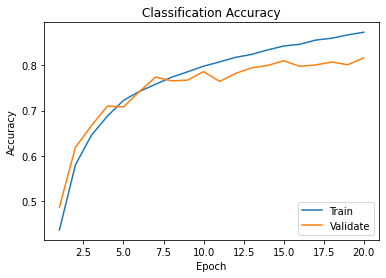

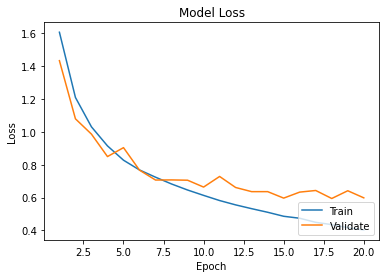

In [50]:
results(model_5)

Top predictions of these images are
airplane : 93.07 
bird : 2.19 
cat : 1.83 
dog : 1.31 
deer : 1.28 
horse : 0.17 
ship : 0.13 
automobile : 0.01 
truck : 0.01 
frog : 0.01 


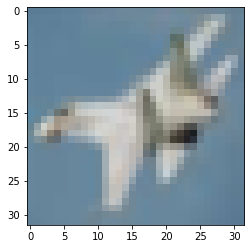

In [51]:
predict_class("file01.jpg", model_5)

In [52]:
model_5.save("model5.h5")